<a href="https://colab.research.google.com/github/ayeshahabib01/github-introfall25-ayeshahabib01/blob/main/In_Class_Assignment_5_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming - In-Class Assignment


Import necessary libraries and load the data

From kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset):
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone on board, resulting in the death ofmore than half of the passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This exercise seeks to explore the factors that appeared to influence survival.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the 'titanic' dataset from seaborn
titanic_data = sns.load_dataset('titanic')

display(titanic_data.head())
print(titanic_data.shape)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 15)


Task 1: Calculate overall survival rate.

Hint: becausse 'survived' is 0 and 1, survival rate can be computed as the .mean() of that column

In [ ]:
# Calculate overall survival rate

survival_rate = titanic_data['survived'].mean()
print(f"Overal Survival Rate: {survival_rate:.2%}")

Overal Survival Rate: 38.38%


Task 2: Calculate and print the survival rates by gender/sex ('sex'), passenger class ('class'), and embarkation point ('embarked'; the location where the journey began).

Hint: the material showed us how to filter material, which can work here. Pandas dataframes also offers a convenient function groupby, that will take a one or a list of columns, and group the data by the values of that/those column(s). Operations (such as .mean()) on the returned item will be performed on each group.

Survival rate by gender:
sex
female    0.74
male      0.19
Name: survived, dtype: float64


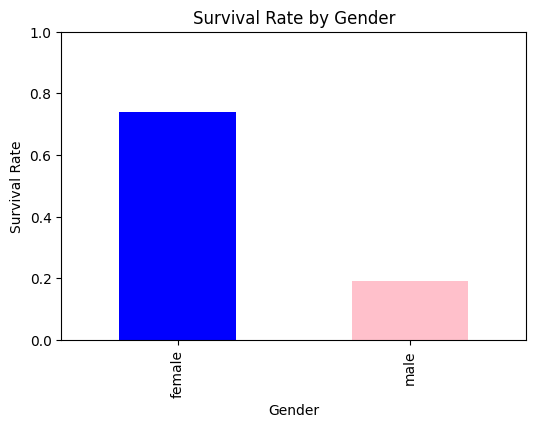

In [ ]:
# Calculate survival rates by gender and visualize it

# calculation
survival_rate_by_gender = titanic_data.groupby('sex')['survived'].mean().round(2)
print("Survival rate by gender:")
print(survival_rate_by_gender)

# visualize

import matplotlib.pyplot as plt

survival_rate_by_gender.plot(kind='bar', color=['blue', 'pink'], figsize=(6,4))

plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()


Survival rate by passenger class:
pclass
1    0.63
2    0.47
3    0.24
Name: survived, dtype: float64


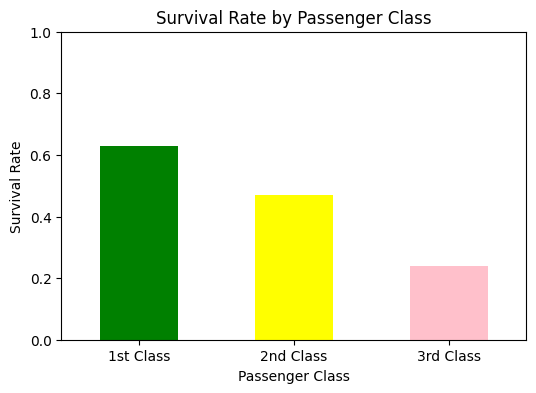

In [ ]:
# Calculate survival rates by passenger class and visualize it

# calculation

survival_rate_by_passenger_class = titanic_data.groupby('pclass')['survived'].mean().round(2)
print("Survival rate by passenger class:")
print(survival_rate_by_passenger_class)

# visualize

import matplotlib.pyplot as plt

survival_rate_by_passenger_class.plot(kind='bar', color=['green','yellow','pink'], figsize=(6,4))

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.xticks([0,1,2], ['1st Class','2nd Class','3rd Class'], rotation=0)
plt.show()


Survival rate by embarkation point:
embarked
C    0.55
Q    0.39
S    0.34
Name: survived, dtype: float64


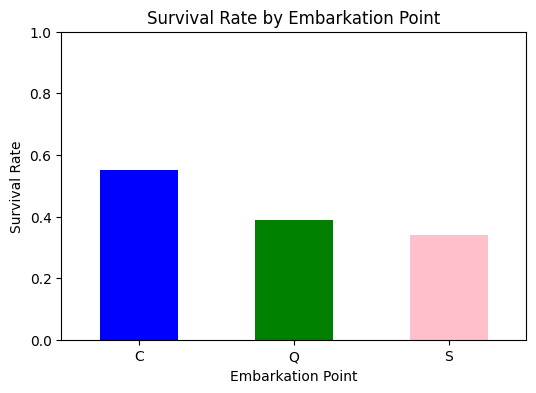

In [ ]:
# Calculate survival rates by embarkation point and visualize it

# calculation

survival_rate_by_embarkation_point = titanic_data.groupby('embarked')['survived'].mean().round(2)
print("Survival rate by embarkation point:")
print(survival_rate_by_embarkation_point)

# visualize

import matplotlib.pyplot as plt

survival_rate_by_embarkation_point.plot(kind='bar', color=['blue','green','pink'], figsize=(6,4))

plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()



Task 3: Calculate the survival rate by age group (under 12 as child, 13-20 as teen, 21-40 as adult, 41-60 as middle-aged, above 61 as senior).

In [ ]:
# create a new column age_group based on the criteria above

titanic_data['age_group'] = pd.cut(
    titanic_data['age'],
    bins=[0, 12, 20, 40, 60, 120],
    labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
)

display(titanic_data[['age', 'age_group']].head(5))


# Calculate survival rates by age group

survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean().round(2)

print("Survival rate by age group:")
print(survival_rate_by_age_group)




,age,age_group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


Survival rate by age group:
age_group
Child          0.58
Teen           0.38
Adult          0.40
Middle-aged    0.39
Senior         0.23
Name: survived, dtype: float64


/tmp/ipython-input-1958206327.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean().round(2)


Task 4: Create a box plot for age distribution by survival.




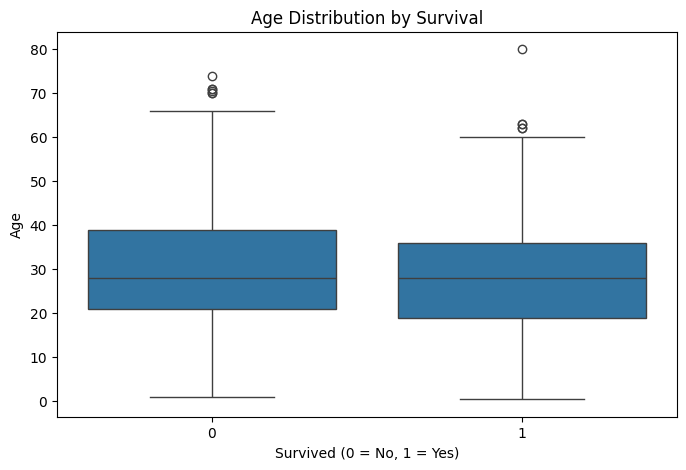

In [ ]:
# Create a box plot for age distribution by survival

plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()




```
# This is formatted as code
```

Task 5: Create a stacked bar chart to visualize the distribution of Titanic passengers by class, using different colors to represent survival status within each class.
Hint: try creating a comment to do this one and use the AI to help. What is this code doing?

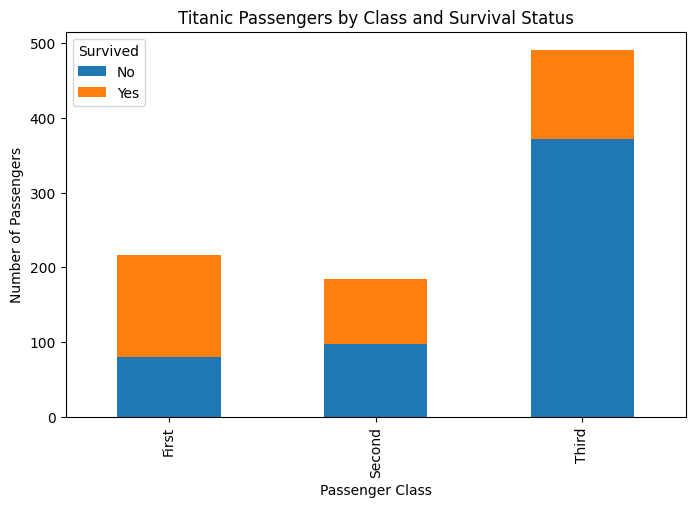

In [ ]:
import matplotlib.pyplot as plt

# Create a stacked bar chart to visualize the distribution of Titanic passengers by class

# create a crosstab, which keeps track of counts of survival by class
class_survival_counts = pd.crosstab(titanic_data['class'], titanic_data['survived'])

# create the stacked bar chart
class_survival_counts.plot(kind='bar', stacked=True, figsize=(8, 5))

# title and labels
plt.title('Titanic Passengers by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



**Open-Ended Questions:** From our analysis, some more in-depth questions can be raised. Please discuss and attempt to answer them by using Python to perform data analysis and visualizations to support your claims. Keep in mind that there are no definitive answers to these questions.

Question 1: Given, from task 2, the survival rates by embarkation point are as follows:

| Embarkation Point | Survival Rate (%) |
|-------------------|--------------------|
| C                 | 55.36              |
| Q                 | 38.96              |
| S                 | 33.70              |

does this indicate that, if you will be on the Titanic, better to select Port C as your embarkation point for increasing the chances of survival?

**Your Q1 discussion here:**

class        First  Second  Third
embark_town                      
Cherbourg       85      17     66
Queenstown       2       3     72
Southampton    127     164    353


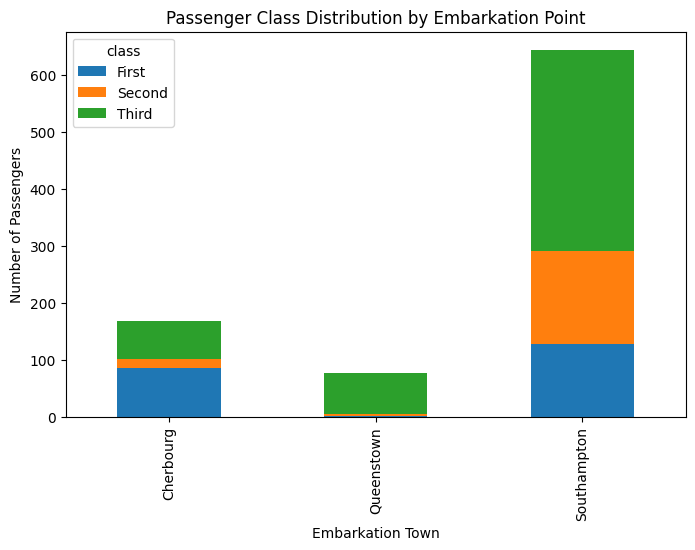

In [ ]:
# Optional: if you have code to support your Q1 discussion, please add it here.

# check if embarkation has a link to passenger class

embark_class_counts = pd.crosstab(titanic_data['embark_town'], titanic_data['class'])
print(embark_class_counts)

# visualize it
embark_class_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Passenger Class Distribution by Embarkation Point')
plt.xlabel('Embarkation Town')
plt.ylabel('Number of Passengers')
plt.show()

# The plot shows that Port S had a significantly higher percentage of third-class passengers compared to Port C.
# While the survival rate was highest for passengers who boarded at Cherbourg, this does not necessarily mean that choosing that port would have increased one’s chances of survival.
# The higher survival rate at Cherbourg reflects the fact that wealthier, first-class passengers were more likely to embark there.
# Overall, survival on the Titanic was influenced way more strongly by passenger class, gender, and age than by the port of embarkation itself.


Question 2: Given, from task 3, the survival rates by age group are as follows:

| Age Group | Survival Rate (%) |
|-----------|--------------------|
| Child     | 57.97              |
| Teen      | 38.18              |
| Adult     | 39.74              |
| Middle-Aged| 39.06              |
| Senior    | 22.73              |

Does this indicate that senior passengers were less taken care of?



**Your Q2 discussion here:**

In [ ]:
# Optional: if you have code to support your Q2 discussion, please add it here.

# check the relationship between senior passengers and their class (to see if the more wealthy elderly survived more because their wealth allowed them to be more taken care of)

seniors = titanic_data[titanic_data['age'] > 60]

senior_class_counts = seniors['class'].value_counts()
print(senior_class_counts)

# The survival rates by age group show that children had the highest survival rate (~58%), while seniors had the lowest (~23%).
# This does not necessarily mean that senior passengers were purposefully “less taken care of.”
# Instead, multiple factors could have contributed to their lower survival, such as reduced mobility or difficulty reaching lifeboats in time.
# Wealth or class does not appear to fully explain the trend, as even some higher-class seniors had lower survival rates.
# Therefore, data suggest that physical limitations and evacuation priorities, rather than neglect or intentional discrimination, were the main factors affecting senior survival.



class
First     14
Third      5
Second     3
Name: count, dtype: int64


When you are done, make sure to submit your assignments in accordance with the instructions on canvas.